In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("WineQT.csv")

In [ ]:
dataset.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [ ]:
dataset.drop(columns="Id", inplace=True)

In [ ]:
# x = dataset.iloc[:,:-1]
# y = dataset["quality"]

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


([<matplotlib.patches.Wedge at 0x7d15cd8b4790>,
 [Text(0.26494052854928357, 1.067617214329193, '5'),
  Text(-0.7794192558547565, -0.7762123572855678, '6'),
  Text(0.8445890754390396, -0.7047476808397658, '7'),
  Text(1.0754568666948876, -0.23106823208484303, '4'),
  Text(1.0967440908619723, -0.0845718579631907, '8'),
  Text(1.0998504227987977, -0.018139665633796133, '3')],
 [Text(0.14451301557233648, 0.582336662361378, '42.3%'),
  Text(-0.42513777592077623, -0.42338855851940055, '40.4%'),
  Text(0.4606849502394761, -0.38440782591259953, '12.5%'),
  Text(0.5866128363790296, -0.12603721750082345, '2.9%'),
  Text(0.5982240495610757, -0.046130104343558555, '1.4%'),
  Text(0.5999184124357079, -0.009894363072979709, '0.5%')])

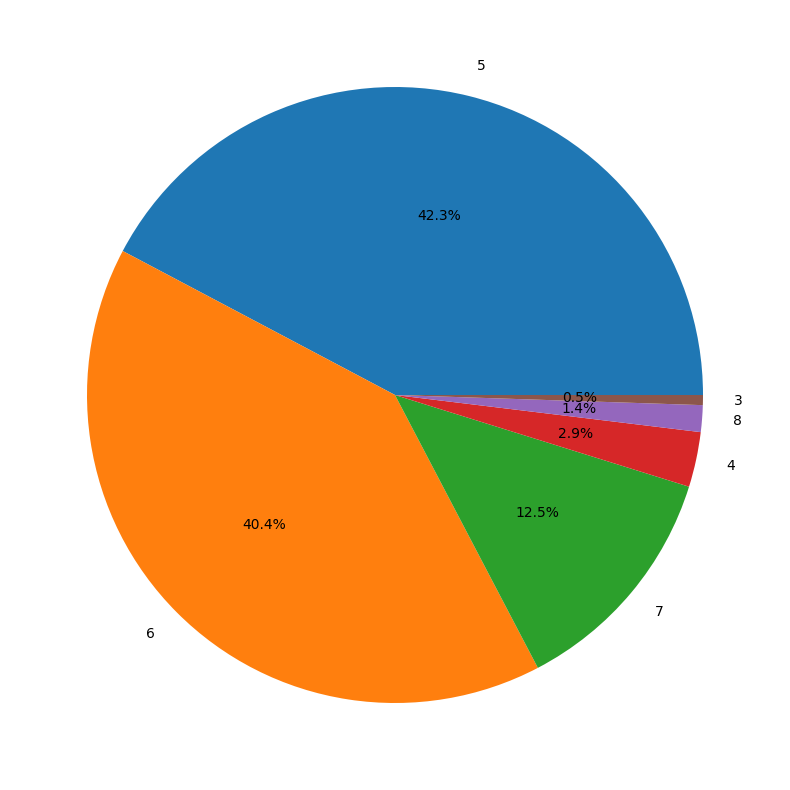

In [ ]:
plt.figure(figsize=(10,10))
plt.pie(dataset["quality"].value_counts(), labels=dataset["quality"].value_counts().index, autopct="%1.1f%%")

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
dataset1 = pd.DataFrame(ss.fit_transform(dataset[["fixed acidity", "volatile acidity", "citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide","density","pH",	"sulphates", "alcohol"]]))

In [ ]:
dataset1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,Quality
0,-0.521580,0.939332,-1.365027,-0.466421,-0.231395,-0.450467,-0.363610,0.555854,1.270695,-0.573658,-0.963382,5
1,-0.292593,1.941813,-1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,-0.708928,0.130881,-0.593601,5
2,-0.292593,1.273492,-1.161568,-0.171289,0.107253,-0.060071,0.246745,0.140103,-0.325775,-0.045254,-0.593601,5


In [ ]:
dataset1["Quality"] = dataset["quality"]

In [79]:
x = dataset.iloc[:, :-1]
y = dataset["quality"]

In [80]:
from imblearn.over_sampling import SMOTE
sm= SMOTE(random_state=42)

In [81]:
x_bal, y_bal = sm.fit_resample(x, y)

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size=0.2, random_state = 42)

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='friedman_mse', max_depth=18, random_state = 42)


In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
df = {"criterion": ["squared_error", "friedman_mse", "absolute_error", "poisson"], "max_depth":[i for i in range (2,20)]}

In [ ]:
gd = GridSearchCV(RandomForestRegressor(), param_grid=df)

In [88]:
gd.fit(x_train, y_train)


KeyboardInterrupt



In [91]:
dataset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [113]:
l = []
l.append(x.iloc[7])

In [114]:
l

[fixed acidity            7.3000
 volatile acidity         0.6500
 citric acid              0.0000
 residual sugar           1.2000
 chlorides                0.0650
 free sulfur dioxide     15.0000
 total sulfur dioxide    21.0000
 density                  0.9946
 pH                       3.3900
 sulphates                0.4700
 alcohol                 10.0000
 Name: 7, dtype: float64]

In [67]:
gd.best_params_

{'criterion': 'friedman_mse', 'max_depth': 18}

In [86]:
rf.fit(x_train, y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=18, random_state=42)

In [87]:
rf.score(x_test, y_test)*100

93.28769080683473

In [115]:
rf.predict(l)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.63])